In [1]:
import pandas as pd

df = pd.read_csv(
    'data.txt', 
    sep='\t',
    header=1,
    names=['label', 'comment', 'author', 'subreddit', 'score', 'ups', 'downs', 'date', 'created_utc', 'parent_comment']
)
df['label'] = df['label'].apply(lambda val: 'Sarcasm' if val == 1 else 'NOT Sarcasm')
df['created_utc'] = pd.to_datetime(df['created_utc'])

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,score,ups,downs
count,1010825.000,1010825.000,1010825.000
mean,6.886,5.499,-0.146
std,48.343,41.273,0.353
min,-507.000,-507.000,-1.000
25%,1.000,0.000,0.000
50%,2.000,1.000,0.000
75%,4.000,3.000,0.000
max,9070.000,5163.000,0.000


In [3]:
def get_columns_info(df: pd.DataFrame) -> pd.DataFrame:
    columns_info = pd.DataFrame(df.count(), columns=['Not NAN'])
    columns_info['total'] = df.shape[0]
    return columns_info

get_columns_info(df)

,Not NAN,total
label,1010825,1010825
comment,1010772,1010825
author,1010825,1010825
subreddit,1010825,1010825
score,1010825,1010825
ups,1010825,1010825
downs,1010825,1010825
date,1010825,1010825
created_utc,1010825,1010825
parent_comment,1010825,1010825


In [4]:
df['label'].value_counts()

Sarcasm        505413
NOT Sarcasm    505412
Name: label, dtype: int64

# Let's clear gaps in data

In [5]:
df = df.dropna()
get_columns_info(df)

,Not NAN,total
label,1010772,1010772
comment,1010772,1010772
author,1010772,1010772
subreddit,1010772,1010772
score,1010772,1010772
ups,1010772,1010772
downs,1010772,1010772
date,1010772,1010772
created_utc,1010772,1010772
parent_comment,1010772,1010772


In [6]:
df['comment'].apply(len).describe()

count   1010772.000
mean         56.692
std          61.821
min           1.000
25%          27.000
50%          46.000
75%          74.000
max       10000.000
Name: comment, dtype: float64

## We need to clean up comments that are too short or too long

In [7]:
lens = df['comment'].apply(len)
df = df[(lens >= lens.quantile(0.03)) & (lens <= lens.quantile(0.97))]
print(f'Remainder: {df.shape[0]}')

Remainder: 955280


/home/letit6e/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


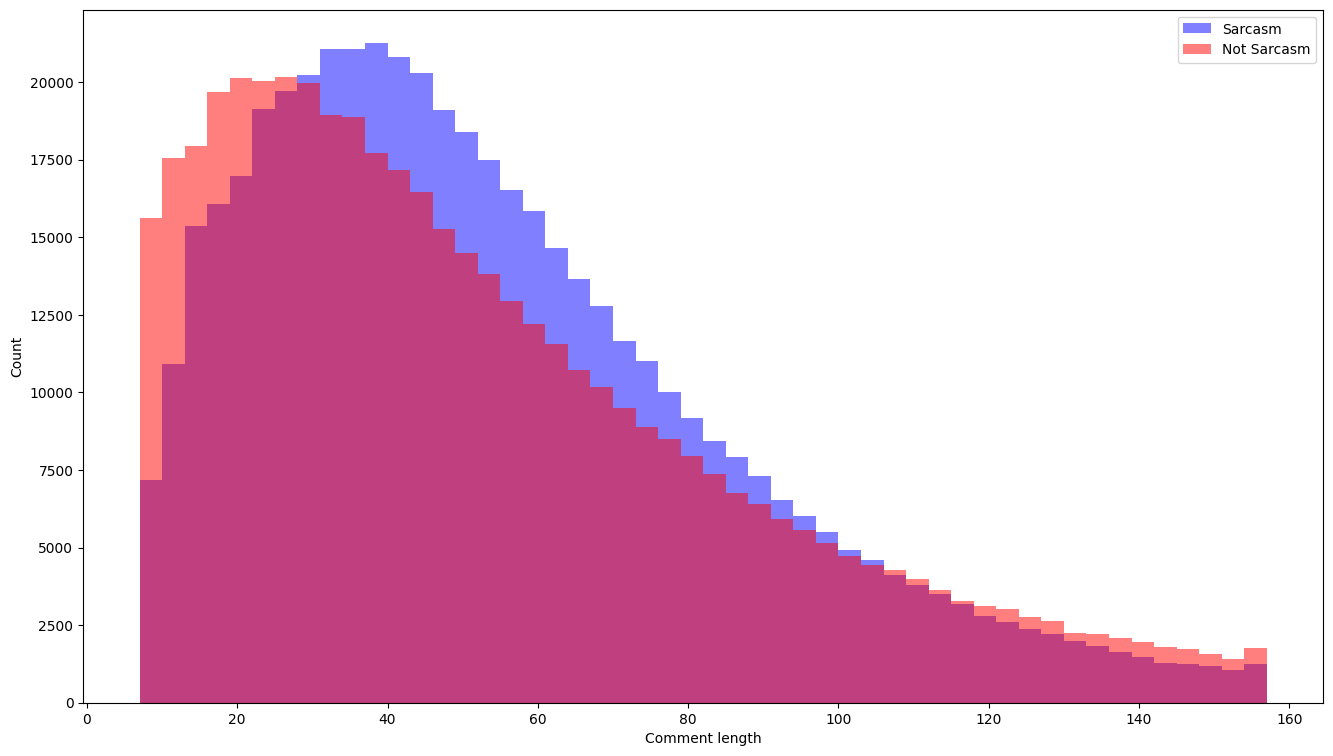

,Sarcasm,NOT Sarcasm
count,489165.000,466115.000
mean,53.824,52.258
std,31.173,34.176
min,7.000,7.000
25%,30.000,25.000
50%,48.000,44.000
75%,72.000,72.000
max,157.000,157.000


In [8]:
import matplotlib.pyplot as plt

sarcastic = df[df['label'] == 'Sarcasm']['comment'].apply(len)
not_sarcastic = df[df['label'] == 'NOT Sarcasm']['comment'].apply(len)

plt.figure(figsize=(16, 9))
plt.hist(sarcastic, bins=50, alpha=0.5, color='blue', label='Sarcasm')
plt.hist(not_sarcastic, bins=50, alpha=0.5, color='red', label='Not Sarcasm')
plt.legend()
plt.ylabel('Count')
plt.xlabel('Comment length')
plt.show()

pd.DataFrame.from_dict({
    'Sarcasm': sarcastic.describe(),
    'NOT Sarcasm': not_sarcastic.describe()
})

In [9]:
def sarcastic_numeric_check(column_name: str) -> pd.DataFrame:
    labels = df['label'].unique()
    
    fig, ax = plt.subplots()
    for i, label in enumerate(labels):
        ax.boxplot(df[df['label'] == label]['score'], positions=[i])
        i+=1
    ax.set_xticklabels(labels)
    
    plt.show()
    
    return pd.DataFrame.from_dict({
        'Sarcasm': df[df['label'] == 'Sarcasm']['score'].describe(),
        'NOT Sarcasm': df[df['label'] == 'NOT Sarcasm']['score'].describe()
    })

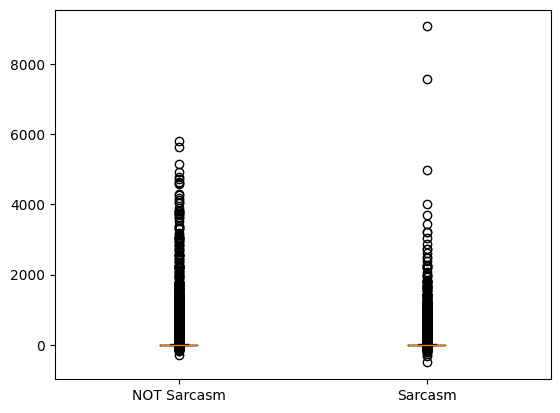

,Sarcasm,NOT Sarcasm
count,489165.000,466115.000
mean,6.413,7.556
std,39.574,57.468
min,-507.000,-298.000
25%,1.000,1.000
50%,2.000,2.000
75%,5.000,4.000
max,9070.000,5818.000


In [10]:
sarcastic_numeric_check('score')

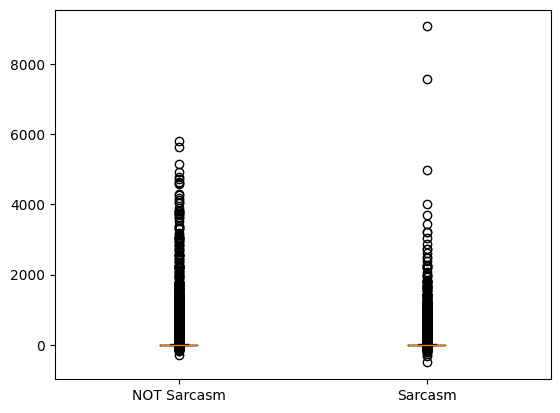

,Sarcasm,NOT Sarcasm
count,489165.000,466115.000
mean,6.413,7.556
std,39.574,57.468
min,-507.000,-298.000
25%,1.000,1.000
50%,2.000,2.000
75%,5.000,4.000
max,9070.000,5818.000


In [11]:
sarcastic_numeric_check('ups')

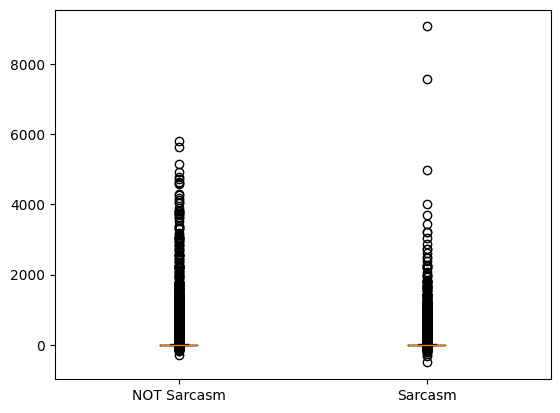

,Sarcasm,NOT Sarcasm
count,489165.000,466115.000
mean,6.413,7.556
std,39.574,57.468
min,-507.000,-298.000
25%,1.000,1.000
50%,2.000,2.000
75%,5.000,4.000
max,9070.000,5818.000


In [12]:
sarcastic_numeric_check('downs')

In [13]:
print('Sarcasm comments subreddit distribution:')
pd.DataFrame(df[df['label'] == 'Sarcasm']['subreddit'].value_counts().head(10))

Sarcasm comments subreddit distribution:


,subreddit
AskReddit,25395
politics,23071
worldnews,16366
leagueoflegends,11001
pcmasterrace,10460
news,9814
funny,7875
pics,7611
todayilearned,7530
GlobalOffensive,7366


In [14]:
print('NOT Sarcasm comments subreddit distribution:')
pd.DataFrame(df[df['label'] == 'NOT Sarcasm']['subreddit'].value_counts().head(10))

NOT Sarcasm comments subreddit distribution:


,subreddit
AskReddit,36441
politics,14388
funny,9315
leagueoflegends,8740
worldnews,8716
pics,7894
pcmasterrace,7458
nfl,6512
news,6309
nba,6279


In [16]:
df.to_csv('data.csv', sep='\t')